<a href="https://colab.research.google.com/github/valmyr/CIRCUITOS-I/blob/main/Exerc_01_circuitos_i_3_unidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [365]:
#https://tinyurl.com/26pzqby7
import sys
!git clone https://github.com/edsonportosilva/ElectricCircuits.git
sys.path.insert(0, '/content/ElectricCircuits/Jupyter notebooks/')

fatal: destination path 'ElectricCircuits' already exists and is not an empty directory.


In [366]:
import sympy as sp
import numpy as np
from matplotlib.pyplot import plot as plt
from utils import round_expr, symdisp, symplot
from sympy.polys.partfrac import apart

In [367]:
sp.init_printing()
# transformada de Laplace
def L(f,t,s):
    return sp.laplace_transform(f, t, s, noconds=True)

# transformada inversa de Laplace
def invL(F,s,t):
    return sp.re(sp.inverse_laplace_transform(F, s, t, noconds=True))

# funções para auxílio na expansão em frações parciais
def adjustCoeff(expr):    
    coeff = expr.as_numer_denom()
    c0 = sp.poly(coeff[1].cancel()).coeffs()[0]
    
    return (coeff[0].cancel()/c0)/(coeff[1].cancel()/c0)

def partFrac(expr, Ndigits):
    expr = expr.cancel()
    expr = apart(adjustCoeff(expr), s, full=True).doit()
    
    return sp.N(expr, Ndigits)

In [368]:
matricula = [1,1,0]
R1 = matricula[0]+1
R2 = matricula[1]+1
R3 = matricula[2]+1
print(R1,R2,R3)

2 2 1


In [369]:
#Definição das variáveis do tipo símbolicas para o método das tensões de nó
#Item C
X,Y,Z,VC,s,t = sp.symbols('X,Y,Z,Vc,s,t')
I1,I2,I3,IC,IL1,IL2 = sp.symbols('I_1,I_2,I_3,I_C,I_L1,I_L2')

In [370]:
I1  = -(X-100/s)/(2*R2)
I2  =  (X-Y)/(2*R1)
I3  =  Y/R1
IL1 =  (Y-Z)/(0.4*s) 
IL2 =  (Z+1)/(s+2*R3)
IC = (X-Z-10/s)/(4000/s)
Eq1 = sp.Eq(I1,I2+IC).simplify()    #Equação nó X
Eq2 = sp.Eq(I2,I3+IL1).simplify()   #Equação nó Y
Eq3 = sp.Eq(IL2,IC+IL1).simplify()  #Equação nó Z

In [371]:
Eq1

In [372]:
Eq2

In [373]:
Eq3

In [374]:
sol = sp.solve([Eq1,Eq2,Eq3],[X,Y,Z],dict= True)[0] # resolução do sistema linear

In [375]:
symdisp('X(s) = ',sol[X],'Vs') #Valor de tensão do nó X no domínio da frequência

<IPython.core.display.Math object>

In [376]:
symdisp('Y(s) = ',sol[Y],'Vs') #Valor de tensão do nó Y no domínio da frequência

<IPython.core.display.Math object>

In [377]:
symdisp('Z(s) = ',sol[Z],'Vs') #Valor de tensão do nó Z no domínio da frequência

<IPython.core.display.Math object>

In [378]:

IL1 = IL1.subs({X:sol[X],Y:sol[Y],Z:sol[Z]}).simplify()# Corrente no indutor L1 = 0,4H pelo método das tensões de nó
IL2 = IL2.subs({X:sol[X],Y:sol[Y],Z:sol[Z]}).simplify()# Corrente no indutor L2 = 1H pelo método das tensões de nó
VC = (sol[X]-sol[Z]).simplify()# Tensão no capacitor C = 250uF pelo método das tensões de nó

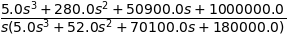

In [379]:
IL2.subs(Z,sol[Z])



In [380]:
symdisp('V_c(0^+) = ',sp.limit(s*VC,s,sp.oo),'V')
symdisp('I_{L1}(0^+) = ',sp.limit(s*IL1,s,sp.oo),'A')
symdisp('I_{L2}(0^+) = ',sp.limit(s*IL2,s,sp.oo),'A')
print()
symdisp('V_c(+\infty) = ',sp.limit(s*VC,s,0),'V')
symdisp('I_{L1}(+\infty) = ',sp.limit(s*IL1,s,0),'A')
symdisp('I_{L2}(+\infty) = ',sp.limit(s*IL2,s,0),'A')



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [381]:
symdisp('V_c(s) = ', VC, 'Vs')

<IPython.core.display.Math object>

In [382]:
symdisp('I_{L1}(s) = ', IL1, 'As')

<IPython.core.display.Math object>

In [383]:
symdisp('I_{L2}(s) = ', IL2, 'As')

<IPython.core.display.Math object>

In [384]:
#Definição das variáveis do tipo símbolicas para o método das correntes de malha
#Item D
Ia,Ib,Ic = sp.symbols('I_a,I_b,I_c')

Eq1 = sp.Eq(2*R2*Ia-(100/s)+2*R1*(Ia-Ib)+R1*(Ia-Ic), 0).simplify()
Eq2 = sp.Eq(-R1*(Ia-Ic)+(0.4*s)*(Ic-Ib)+s*Ic-1+2*R3*Ic,0).simplify()
Eq3 = sp.Eq((4000/s)*Ib+10/s-0.4*s*(Ic-Ib)-2*R1*(Ia-Ib),0).simplify()

In [385]:
Eq1

In [386]:
Eq2

In [387]:
Eq3

In [388]:
sol_malha = sp.solve([Eq1,Eq2,Eq3],[Ia,Ib,Ic],dict= True)[0]

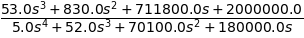

In [389]:
sol_malha[Ia] #Valor de corrente na malha 1 no domínio da frequência

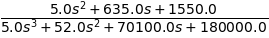

In [390]:
sol_malha[Ib]#Valor de corrente na malha 2 no domínio da frequência

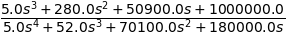

In [391]:
sol_malha[Ic]#Valor de corrente na malha 3 no domínio da frequência

In [392]:
VC_malha = ((4000/s)*sol_malha[Ib]+10/s).simplify() #Corrente no indutor L1 = 0,4H pelo método das correntes de malha
IL1_malha = (sol_malha[Ic]-sol_malha[Ib]).simplify()# #Corrente no indutor L1 = 0,4H pelo método das correntes de malha
IL2_malha  = sol_malha[Ic].simplify()#Tensão no capacitor C = 250uF pelo método das tensões de nó

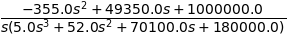

In [393]:
IL1_malha

In [394]:
symdisp('V_c(s) = ', VC, 'Vs')
symdisp('I_{L1}(s) = ', IL1, 'As')
symdisp('I_{L2}(s) = ', IL2, 'As')

if(VC_malha == VC and IL1 == IL1_malha and IL2 == IL2_malha):
    print("Resultado consistênte")
else:
    print("Resultado Inconsistênte")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Resultado consistênte


In [395]:
VC_ = partFrac(VC,2).as_ordered_terms()
IL1_ = partFrac(IL1,2).as_ordered_terms()
IL2_ = partFrac(IL2,2).as_ordered_terms()
symdisp('V_C(s) = ',VC_, 'Vs')
symdisp('I_{L1}(s) = ',IL1_, 'As')
symdisp('I_{L2}(s) = ',IL2_, 'As')


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

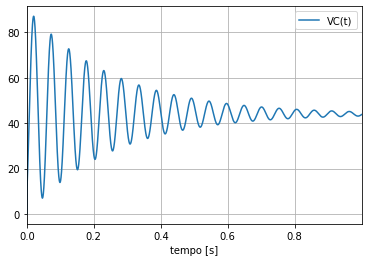

In [362]:
vc = 0
for i in range(len(VC_)):
    vc += invL(VC_[i],s,t)
vc = vc.simplify()
symplot(t,vc,np.arange(0,1,.0001),'VC(t)')

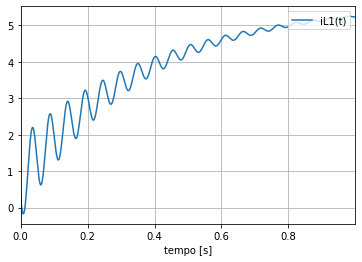

In [363]:
iL1 = 0
for i in range(len(IL1_)):
    iL1 += invL(IL1_[i],s,t)
iL1 = iL1.simplify()
symplot(t,iL1,np.arange(0,1,.0001),'iL1(t)')

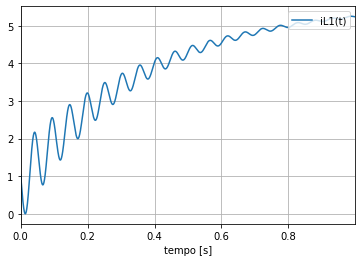

In [364]:
iL2 = 0
for i in range(len(IL2_)):
    iL2 += invL(IL2_[i],s,t)
iL2 = iL2.simplify()
symplot(t,iL2,np.arange(0,1,.0001),'iL1(t)')